# **Predict credit card approval**

In [49]:
# install packages

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
\
from sklearn.model_selection import train_test_split

# New section

In [2]:
# Load data

application = pd.read_csv("/content/application_record_bal.csv", sep=',')
application.head()

,Unnamed: 0,has_a_car,has_a_property,no_of_children,income,education_level,age,employment_length,has_a_workphone,has_a_phone,...,job_title_Medicine staff,job_title_Pensioner,job_title_Private service staff,job_title_Realty agents,job_title_Sales staff,job_title_Secretaries,job_title_Security staff,job_title_Unknown,job_title_Waiters/barmen staff,is_risky_customer
0,0,1,1,0,14,3,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1,0,14,3,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,1,0,5,1,7,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0,1,0,11,1,6,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,0,11,1,6,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application.columns

Index(['Unnamed: 0', 'has_a_car', 'has_a_property', 'no_of_children', 'income',
       'education_level', 'age', 'employment_length', 'has_a_workphone',
       'has_a_phone', 'has_an_email', 'gender_F', 'gender_M',
       'employment_status_Commercial associate', 'employment_status_Pensioner',
       'employment_status_State servant', 'employment_status_Student',
       'employment_status_Working', 'marital_status_Civil marriage',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single / not married', 'marital_status_Widow',
       'housing_Co-op apartment', 'housing_House / apartment',
       'housing_Municipal apartment', 'housing_Office apartment',
       'housing_Rented apartment', 'housing_With parents',
       'job_title_Accountants', 'job_title_Cleaning staff',
       'job_title_Cooking staff', 'job_title_Core staff', 'job_title_Drivers',
       'job_title_HR staff', 'job_title_High skill tech staff',
       'job_title_IT staff', 'job_title_Lab

In [4]:
application = application.drop(['Unnamed: 0'], axis=1)
application.head()

,has_a_car,has_a_property,no_of_children,income,education_level,age,employment_length,has_a_workphone,has_a_phone,has_an_email,...,job_title_Medicine staff,job_title_Pensioner,job_title_Private service staff,job_title_Realty agents,job_title_Sales staff,job_title_Secretaries,job_title_Security staff,job_title_Unknown,job_title_Waiters/barmen staff,is_risky_customer
0,1,1,0,14,3,2,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,14,3,2,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,5,1,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,11,1,6,1,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,11,1,6,1,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# checking for any nan value

application.isnull().sum().sum()

12

In [6]:
application = application.dropna()

In [7]:
application.isnull().sum().sum()

0

In [21]:
train, test = train_test_split(application, test_size=0.2)
#val, test = train_test_split(val, test_size=0.5)
print(len(train), 'train examples')
#print(len(val), 'validation examples')
print(len(test), 'test examples')

64380 train examples
16095 test examples


In [22]:
# separate the label from the features

feature_set = ['is_risky_customer']

train_target = train["is_risky_customer"]
train_features = train.copy().drop(feature_set, axis=1)

test_target = test["is_risky_customer"]
test_features = test.copy().drop(feature_set, axis=1)

#val_target = val["is_risky_customer"]
#val_features = val.copy().drop(feature_set, axis=1)

In [23]:
train_target = train_target.to_numpy()

In [24]:
test_target = test_target.to_numpy()

In [11]:
#val_target = val_target.to_numpy()

In [25]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99: 
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

### END CODE HERE

In [34]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.cast(y_pred, tf.bool)

        true_positives = tf.reduce_sum(tf.cast(tf.logical_and(y_true, y_pred), self.dtype))
        false_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.logical_not(y_true), y_pred), self.dtype))
        false_negatives = tf.reduce_sum(tf.cast(tf.logical_and(y_true, tf.logical_not(y_pred)), self.dtype))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1_score = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1_score

In [40]:
# Define input and output tensors
xs = train_features
ys = train_target

  # Instantiate the callback class
callbacks = myCallback()

# Define your model 
model = tf.keras.Sequential([
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile your model
# Set the optimizer to Stochastic Gradient Descent
# and use Mean Squared Error as the loss function
model.compile(loss=tf.keras.losses.binary_crossentropy,
optimizer=tf.keras.optimizers.Adam(
learning_rate=0.001),
metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy')
])

# Fit the model for 10 epochs adding the callbacks
# and save the training history
history = model.fit(train_features, train_target, 
                    batch_size = 128,
                    epochs=100, callbacks=[callbacks],
                    validation_split=0.2)


Epoch 1/100
403/403 [==============================] - 4s 7ms/step - loss: 0.6883 - accuracy: 0.5520 - val_loss: 0.6839 - val_accuracy: 0.5609
Epoch 2/100
403/403 [==============================] - 2s 5ms/step - loss: 0.6838 - accuracy: 0.5593 - val_loss: 0.6822 - val_accuracy: 0.5650
Epoch 3/100
403/403 [==============================] - 2s 4ms/step - loss: 0.6764 - accuracy: 0.5761 - val_loss: 0.6758 - val_accuracy: 0.5832
Epoch 4/100
403/403 [==============================] - 2s 5ms/step - loss: 0.6642 - accuracy: 0.5945 - val_loss: 0.6630 - val_accuracy: 0.6049
Epoch 5/100
403/403 [==============================] - 2s 5ms/step - loss: 0.6480 - accuracy: 0.6155 - val_loss: 0.6551 - val_accuracy: 0.6122
Epoch 6/100
403/403 [==============================] - 2s 4ms/step - loss: 0.6290 - accuracy: 0.6365 - val_loss: 0.6478 - val_accuracy: 0.6198
Epoch 7/100
403/403 [==============================] - 2s 4ms/step - loss: 0.6049 - accuracy: 0.6599 - val_loss: 0.6172 - val_accuracy: 0.6591

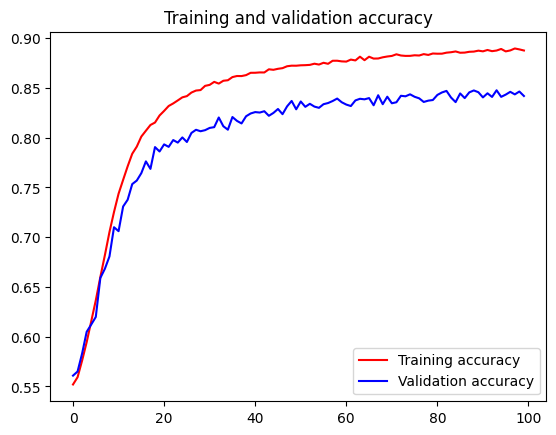

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

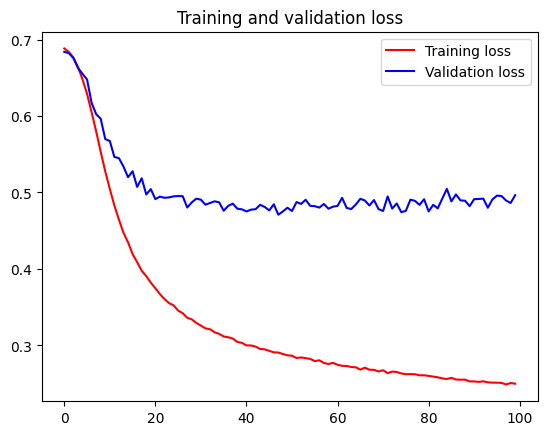

<Figure size 640x480 with 0 Axes>

In [42]:
epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [45]:
y_pred = model.predict(test_features)

503/503 [==============================] - 1s 2ms/step


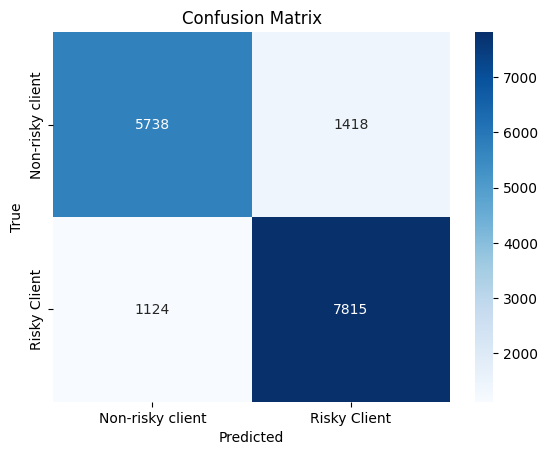

In [50]:
# Convert probabilities to binary predictions
binary_predictions = np.round(y_pred).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(test_target, binary_predictions)

# Define class labels
class_labels = ['Non-risky client', 'Risky Client']

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [52]:
# save the model

def download_history():
  import pickle
  from google.colab import files

  with open('predict_credit_card.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('predict_credit_card.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>